{'3,8 GHz': 80, '2,6 GHz TDD': 32, '26 GHz': 3}
#######################################################
{'Pays de la Loire': 5, 'Île-de-France': 44, 'Grand Est': 4, 'Bretagne': 17, 'Bourgogne-Franche-Comté': 1, 'Occitanie': 10, 'Normandie': 7, 'Auvergne-Rhône-Alpes': 8, "Provence-Alpes-Côte d'Azur": 9, 'Hauts-de-France': 5, 'Guyane': 1, 'Centre-Val de Loire': 3, 'Guadeloupe': 1}
#######################################################


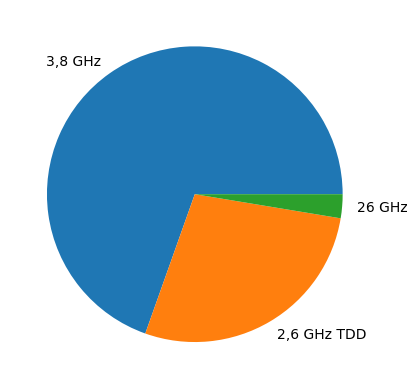

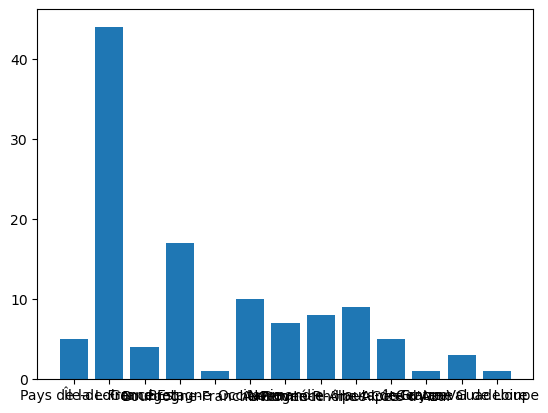

In [ ]:
import tkinter as tk
import pandas
import os

from tkinter import ttk
from PIL import Image, ImageTk
from matplotlib import pyplot as plt

SEPARATOR = "#######################################################"
CSV_FILE_NAME = "data.csv"

dataFrame = pandas.read_csv(CSV_FILE_NAME, encoding='CP1252', sep=';')

# Abdoul Hakim
def average(list_valeur):
    """
    in : list_valeur (list of numbers)
    out: float
    description : This function calculates and returns the average value of a list. If the list is empty, it returns 0.
    """
    if list_valeur:
        return sum(list_valeur) / len(list_valeur)
    else:
        return 0

# Hugo
def action_frequence():
    """
    in : Nothing
    out: None
    description : This function displays the frequency chart image on the Tkinter canvas.
    """
    canvas = tk.Canvas(fenetre, width=300, height=200)
    canvas.grid()
    canvas.create_image(0, 0, image=photo, anchor="nw")  # fonction qui fera apparaitre le diagramme

# Hugo
def action_region():
    """
    in : Nothing
    out: None
    description : This function displays the region chart image on the Tkinter canvas.
    """
    canvas = tk.Canvas(fenetre, width=300, height=200)
    canvas.grid()
    canvas.create_image(0, 0, image=photo, anchor="nw")  # fonction qui fera apparaitre le diagramme

# Hugo
def action_experimentateur():
    """
    in : Nothing
    out: None
    description : This function displays the experimenter chart image on the Tkinter canvas.
    """
    canvas = tk.Canvas(fenetre, width=300, height=200)
    canvas.grid()
    canvas.create_image(0, 0, image=photo, anchor="nw")  # fonction qui fera apparaitre le diagramme

# Razi
def generate_pie_chart(data_dict, fig_name):
    """
    in : data_dict (dict), fig_name (str)
    out: None
    description : This function generates a pie chart from the data dictionary and saves it as an image.
    """
    generate_chart(True, data_dict, fig_name)

# Razi
def generate_bar_chart(data_dict, fig_name):
    """
    in : data_dict (dict), fig_name (str)
    out: None
    description : This function generates a bar chart from the data dictionary and saves it as an image.
    """
    generate_chart(False, data_dict, fig_name)

# Razi
def generate_chart(is_pie, data_dict, fig_name):
    """
    in : is_pie (bool), data_dict (dict), fig_name (str)
    out: None
    description : This function creates and saves a chart (pie or bar) based on the given data dictionary.
    """
    list_key = []
    list_value = []

    for key, value in data_dict.items():
        assert type(value) == int, "The type of the data in the list must me int"
        list_key.append(key)
        list_value.append(value)
    
    if is_pie :
        plt.pie(list_value, labels=list_key)
    else :
        plt.bar(list_key, list_value)

    fig = plt.figure(figsize=(10, 7))
    fig.savefig(fig_name)
    plt.close(fig)
    plt.show()
    
# Zidane
def get_column(indice_x):
    """
    in : indice_x (int)
    out: column (list)
    description : This function returns a list containing all values from the specified column index.
    """
    return dataFrame.iloc[:,indice_x].to_list()

# Malik
def get_raw(indice_y):
    """
    in : indice_y (int)
    out: line (list) or None
    description : This function returns the line at the given index from the loaded CSV data.
    """
    return dataFrame.iloc[indice_y].to_list()

# Razi
def get_cell(x, y):
    """
    in : x (int), y (int)
    out: cell (str) or None
    description : This function returns the content of a cell located at column x and row y.
    """
    row = get_raw(y)
    if row is not None and 0 <= x < len(row):
        return row[x]
    else:
        return None

# Razi
def count(column_indice):
    """
    in : column_indice (int)
    out: dict_item (dict)
    description : This function counts the number of occurrences for each unique value in a specific column.
    """
    dict_item = {}
    list_item = get_column(column_indice)
    for i in range(len(list_item)):
        if i != 0: # Permet de ne pas récupérer le nom de la colonne
            dict_item[list_item[i]] = dict_item.get(list_item[i], 0) + 1
    return dict_item

# Razi
def count_frequency():
    """
    in : Nothing
    out: dict_frequency (dict)
    description : This function counts how many times each frequency appears in the CSV data.
    """
    return count(1)


# Razi
def count_region():
    """
    in : Nothing
    out: dict_region (dict)
    description : This function counts how many times each region appears in the CSV data.
    """
    return count(11)


def action_frequence():
    os.system("start Diagramme_des_fréquences.html")            #fonction qui fera apparaitre le diagramme avec du html


def action_region():
    os.system("start Diagramme_des_régions.html")             #fonction qui fera apparaitre le diagramme avec du html


def action_experimentateur():
    os.system("start Diagramme_des_expérimentateurs.html")            #fonction qui fera apparaitre le diagramme avec du html

if __name__ == "__main__":

    print(count_frequency())
    print(SEPARATOR)
    print(count_region())
    print(SEPARATOR)

    generate_pie_chart(count_frequency(), "pie_frequency.png")
    generate_bar_chart(count_region(), "bar_region.png")

    fenetre=tk.Tk()
    fenetre.title("Interface graphique")
    fenetre.geometry("720x640")            # création de la fenêtre 
    
    frm=ttk.Frame(fenetre)
    frm.grid()
    
    titre=ttk.Label(frm,text="Ensemble des diagrammes")
    titre.grid(column=0,row=0,pady=20)                        #titre 

    frequence=ttk.Label(frm,text="Diagramme de l'utilisation des fréquences")                   #Création du texte pour les diagrammes
    frequence.grid(column=0,row=1,pady=0,padx=0)
    
    region=ttk.Label(frm,text="Diagramme des régions les plus représentés")                     #Création du texte pour les diagrammes
    region.grid(column=0,row=2,pady=0,padx=0)
    
    experimentateur=ttk.Label(frm,text="Diagramme des expérimentateurs les plus représentés")   #Création du texte pour les diagrammes
    experimentateur.grid(column=0,row=3,pady=0,padx=0)
    
    boutonfrequence=ttk.Button(frm,text="Ouvrir",command=action_frequence)
    boutonfrequence.grid(column=1,row=1)
    
    boutonregion=ttk.Button(frm,text="Ouvrir",command=action_region)
    boutonregion.grid(column=1,row=2)
    
    boutonexperimentateur=ttk.Button(frm,text="Ouvrir",command=action_experimentateur)      #Création des bouton pour afficher les diagrammes
    boutonexperimentateur.grid(column=1,row=3)

    fenetre.mainloop()
    